Q-11. Given the data of a feature contributing to different classes:

https://drive.google.com/file/d/1mCjtYHiX--mMUjicuaP2gH3k-SnFxt8Y/view?usp=share_

a. Check whether the distribution of all the classes are the same or not.

b. Check for the equality of variance

c. Which amount LDA and QDA would perform better on this data for classification and why.

d. Check the equality of mean for between all the classes.

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns

In [7]:
import scipy.stats as stats
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('D:\project\Placement-Assignment_lakshmanulli\Statistics\Q3 assignment\data.csv')
df.head()

,Patient ID,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
0,1,130,120
1,2,142,135
2,3,120,118
3,4,135,127
4,5,148,140


In [5]:
BP_Before = df[' Blood Pressure Before (mmHg)']
BP_After = df[' Blood Pressure After (mmHg)']

**a. Check whether the distribution of all the classes are the same or not.**

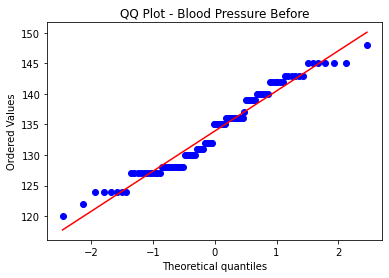

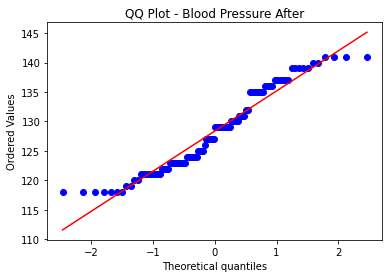

In [8]:
stats.probplot(BP_Before, dist="norm", plot=plt)
plt.title('QQ Plot - Blood Pressure Before')
plt.show()

stats.probplot(BP_After, dist="norm", plot=plt)
plt.title('QQ Plot - Blood Pressure After')
plt.show()

In [9]:
# Using Chi-Square for testing:
from scipy.stats import chi2_contingency

# Create the contingency table
contingency_table = pd.crosstab(BP_Before, BP_After)

# Perform the Chi-Square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print("Chi-Square test results:")
print("Chi2 statistic:", chi2)
print("p-value:", p_value)

Chi-Square test results:
Chi2 statistic: 785.0193259121831
p-value: 3.0238475891360273e-44


In [10]:
# Using Kolmogorov-Smirnov Test:
from scipy.stats import kstest

stat, p_value = kstest(BP_Before, BP_After)
print(f" Kolmogorov-Smirnov Test: statistic={stat:.4f}, p-value={p_value:.4f}")

 Kolmogorov-Smirnov Test: statistic=0.3600, p-value=0.0000


**b. Check for the equality of variance**

In [11]:
# Levene's test
statistic_levene, p_value_levene = stats.levene(BP_Before, BP_After)
print("Levene's test - p-value:", p_value_levene)

# Bartlett's test
statistic_bartlett, p_value_bartlett = stats.bartlett(BP_Before, BP_After)
print("Bartlett's test - p-value:", p_value_bartlett)

Levene's test - p-value: 0.6715080090945493
Bartlett's test - p-value: 0.6697747425427487


c. Which amount LDA and QDA would perform better on this data for classification and why.

Linear Discriminant Analysis (LDA) and Quadratic Discriminant Analysis (QDA) are classification algorithms that assume the data follows a normal distribution.

A major difference between the two is that LDA assumes the feature covariance matrices of both classes are the same, which results in a linear decision boundary. In contrast, QDA is less strict and allows different feature covariance matrices for different classes, which leads to a quadratic decision boundary.

So, we need to check whether both the classes are having same covariance matrices or not.

In [13]:
# Calculate the covariance matrices
covariance_matrix_1 = np.cov(BP_Before, rowvar=False)
covariance_matrix_2 = np.cov(BP_After, rowvar=False)

# Compare the covariance matrices
if np.array_equal(covariance_matrix_1, covariance_matrix_2):
    print("The covariance matrices are the same.")
else:
    print("The covariance matrices are different.")


The covariance matrices are different.



**d. Check the equality of mean for between all the classes.**

In [14]:
# Using t-Test:

from scipy.stats import ttest_ind

statistic, p_value = ttest_ind(BP_Before, BP_After)

# Compare p-value to a significance level (0.05)
if p_value < 0.05:
    print("There is a significant difference in means between the two classes.")
else:
    print("There is no significant difference in means between the two classes.")

There is a significant difference in means between the two classes.
